<a href="https://colab.research.google.com/github/dhruvpathak1/machine_learning/blob/main/E008_ML_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dhruv Pathak (E008)

*Batch: E1*



---


**Machine Learning Assignment 2**



Importing Libraries

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
import numpy as np

Importing Dataset

In [3]:
url = 'https://raw.githubusercontent.com/dhruvpathak1/machine_learning/main/weather_australia.csv'
data = pd.read_csv(url)

# **Data Analysis**

In [4]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,11-05-2017,Albury,3.9,19.9,0.0,15.0,0.0,6.0,100.0,48.0,1026.4,1023.6,8.0,NaN,7.9,19.7,No,No
2995,12-05-2017,Albury,4.2,16.4,0.0,17.0,2.0,9.0,100.0,64.0,1027.2,1024.0,NaN,7.0,7.6,16.2,No,No
2996,13-05-2017,Albury,4.6,19.4,0.0,28.0,6.0,9.0,83.0,55.0,1024.6,1020.8,1.0,1.0,10.0,19.0,No,No
2997,14-05-2017,Albury,7.7,18.2,0.0,20.0,6.0,9.0,82.0,59.0,1022.5,1019.7,7.0,1.0,10.9,18.2,No,No


In [ ]:
data.shape

(2999, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       2999 non-null   object 
 1   MinTemp        2999 non-null   float64
 2   MaxTemp        2999 non-null   float64
 3   Rainfall       2970 non-null   float64
 4   WindGustSpeed  2999 non-null   float64
 5   WindSpeed9am   2999 non-null   float64
 6   WindSpeed3pm   2999 non-null   float64
 7   Humidity9am    2999 non-null   float64
 8   Humidity3pm    2999 non-null   float64
 9   Pressure9am    2999 non-null   float64
 10  Pressure3pm    2999 non-null   float64
 11  Cloud9am       1261 non-null   float64
 12  Cloud3pm       1413 non-null   float64
 13  Temp9am        2990 non-null   float64
 14  Temp3pm        2991 non-null   float64
 15  RainToday      2999 non-null   object 
 16  RainTomorrow   2999 non-null   object 
dtypes: float64(14), object(3)
memory usage: 398.4+ KB


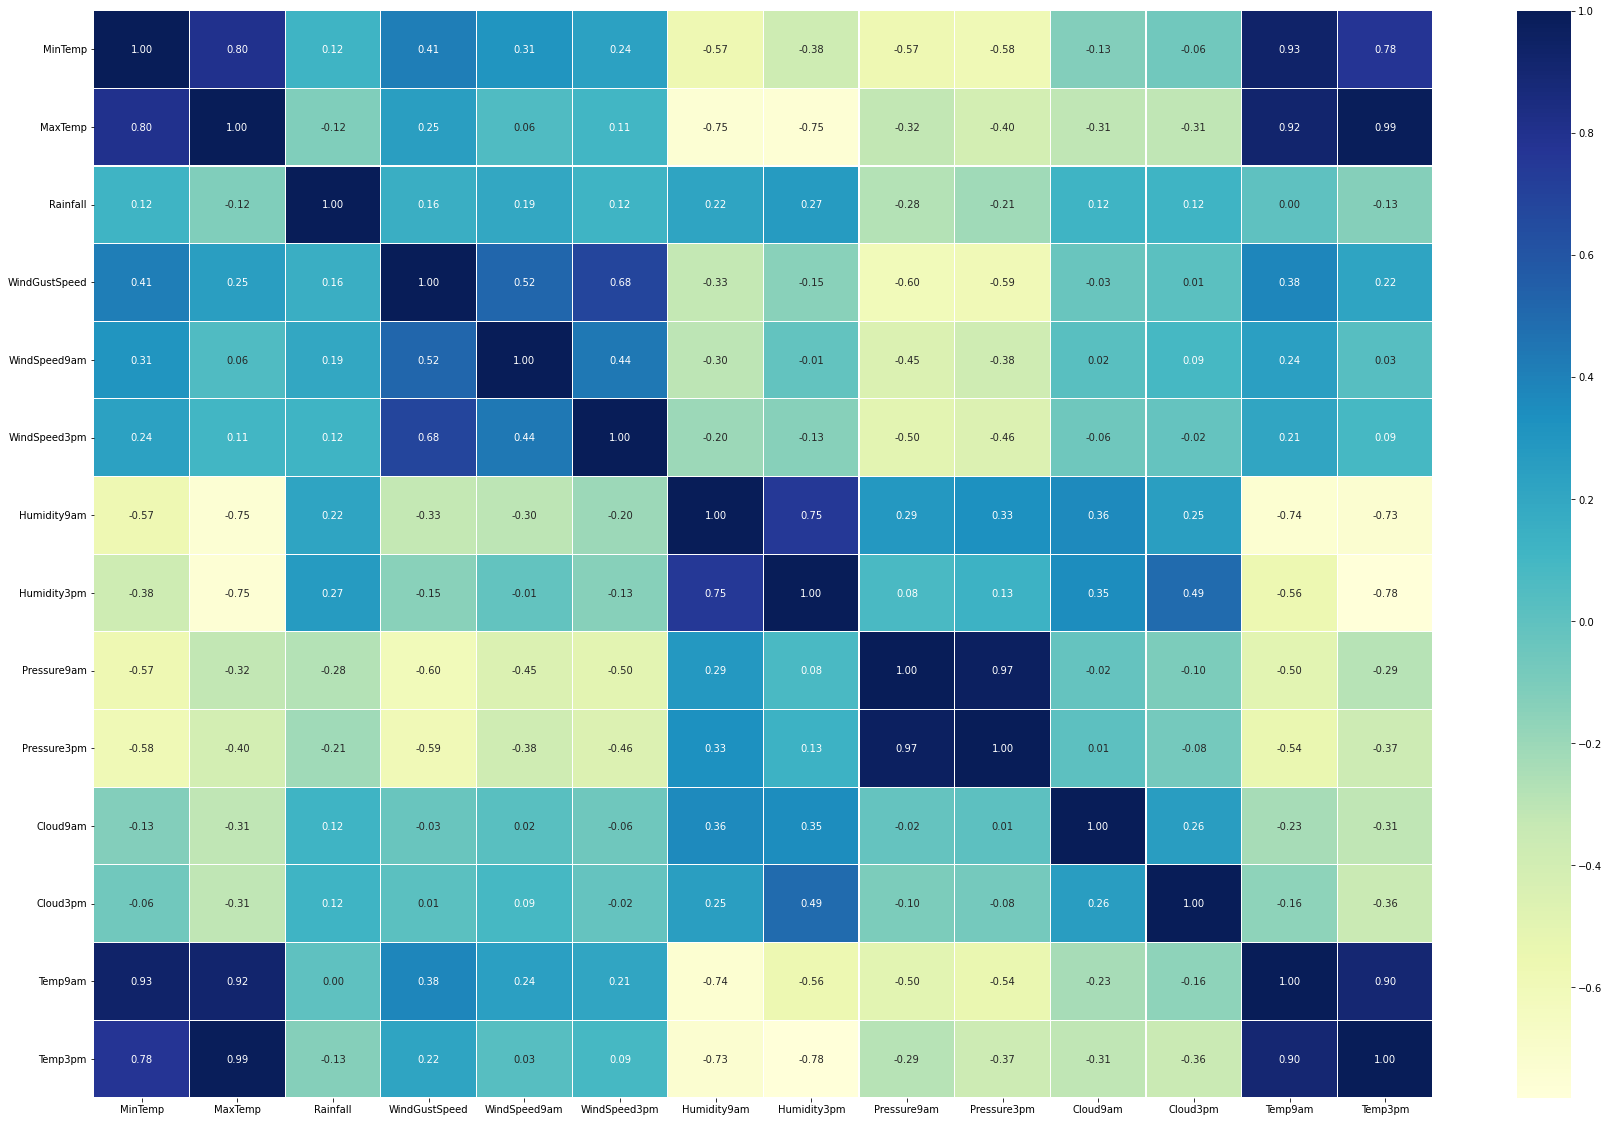

In [5]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize = (30, 20))
ax = sns.heatmap(corr_matrix, annot = True, linewidths = 0.2, fmt = ".2f", cmap = "YlGnBu")

In [ ]:
data.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,2999.000000,2999.000000,2999.000000,2999.000000,2990.000000,2988.000000,2999.000000,2999.000000,2994.000000,2991.000000,1261.000000,1413.000000,2999.000000,2999.000000,2999.000000,2999.000000
mean,9.617436,22.741332,1.923165,33.147624,8.274916,14.465863,73.789967,47.629890,1018.260454,1015.649281,6.404441,5.404105,14.461940,21.469776,0.208069,0.207736
std,6.042324,7.781214,6.229458,13.274107,6.740073,7.192031,17.340237,19.766729,7.323202,7.069870,2.373086,2.830462,6.333818,7.510187,0.405994,0.405754
min,-2.800000,6.800000,0.000000,9.000000,0.000000,0.000000,18.000000,7.000000,989.800000,982.900000,0.000000,1.000000,0.300000,6.400000,0.000000,0.000000
25%,4.800000,15.900000,0.000000,24.000000,4.000000,9.000000,60.000000,32.000000,1013.300000,1010.600000,5.000000,2.000000,9.400000,15.000000,0.000000,0.000000
50%,9.300000,22.100000,0.000000,31.000000,7.000000,13.000000,75.000000,47.000000,1018.250000,1015.600000,8.000000,7.000000,14.300000,20.800000,0.000000,0.000000
75%,14.400000,29.000000,0.500000,41.000000,11.000000,19.000000,87.000000,60.000000,1023.100000,1020.400000,8.000000,8.000000,19.400000,27.300000,0.000000,0.000000
max,28.300000,44.800000,104.200000,107.000000,37.000000,50.000000,100.000000,100.000000,1039.900000,1036.100000,8.000000,8.000000,34.500000,43.400000,1.000000,1.000000


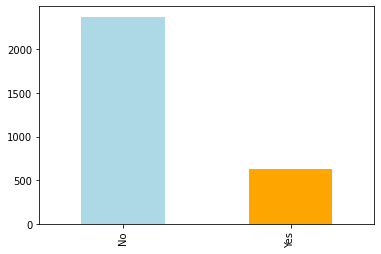

In [6]:
data["RainToday"].value_counts().plot(kind = "bar", color = ["lightblue", "orange"])

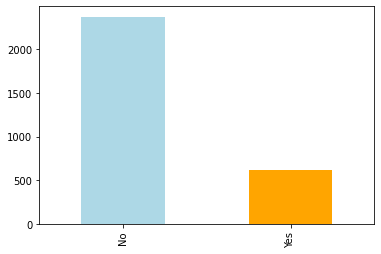

In [7]:
data["RainTomorrow"].value_counts().plot(kind = "bar", color = ["lightblue", "orange"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'MinTemp')

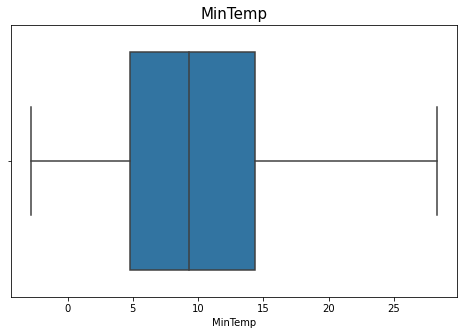

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('MinTemp',data = data)
plt.title("MinTemp",fontsize = 15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'MaxTemp')

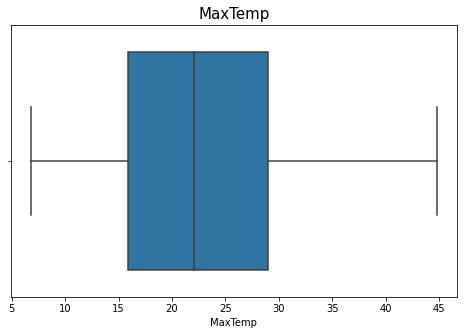

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot('MaxTemp',data = data)
plt.title("MaxTemp",fontsize = 15)

# **Data Preprocessing**

Checking Null values

In [9]:
data.isna().sum()

Date                0
Location            0
MinTemp            11
MaxTemp            11
Rainfall           29
WindGustSpeed      32
WindSpeed9am        9
WindSpeed3pm       11
Humidity9am         9
Humidity3pm         8
Pressure9am         5
Pressure3pm         8
Cloud9am         1738
Cloud3pm         1586
Temp9am             9
Temp3pm             8
RainToday           0
RainTomorrow        0
dtype: int64

Filling Null Values

In [10]:
data["MinTemp"].fillna(value = data["MinTemp"].mean(), inplace = True)
data["MaxTemp"].fillna(value = data["MaxTemp"].mean(), inplace = True)
data["WindGustSpeed"].fillna(value = data["WindGustSpeed"].mean(), inplace = True)
data["Rainfall"].fillna(value = data["Rainfall"].mean(), inplace = True)
data["Humidity9am"].fillna(value = data["Humidity9am"].mean(), inplace = True)
data["Humidity3pm"].fillna(value = data["Humidity3pm"].mean(), inplace = True)
data["Temp9am"].fillna(value = data["Temp9am"].mean(), inplace = True)
data["Temp3pm"].fillna(value = data["Temp3pm"].mean(), inplace = True)

In [11]:
data['RainToday']= data['RainToday'].map({'Yes':1,'No':0})
data['RainTomorrow']= data['RainTomorrow'].map({'Yes':1,'No':0})

In [12]:
data = data.drop("Date", axis=1)
data = data.drop("Location", axis=1)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score,recall_score,precision_score

In [14]:
X = data[['Rainfall','Temp9am','Temp3pm','Humidity9am','Humidity3pm','RainToday']]
y = data['RainTomorrow']

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 101)

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# **Logistic Regression**

In [17]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

In [18]:
print("Accuracy:",accuracy_score(y_test, pred)*100)
print("Precision:",precision_score(y_test, pred)*100)
print("Recall:",recall_score(y_test, pred)*100)

Accuracy: 84.33333333333334
Precision: 71.60493827160494
Recall: 44.96124031007752


In [19]:
cm = confusion_matrix(y_test, pred)
print(cm)

[[448  23]
 [ 71  58]]


In [20]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
sens = tp/(tp+fn)
spec = tn/(tn+fp)

print(f"True Positive Rate: ", 100*sens)
print(f"True Negative Rate: ", 100*spec)


True Positive Rate:  44.96124031007752
True Negative Rate:  95.1167728237792


In [21]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = roc_auc_score(y_test, pred)
print('AUC: %.3f' % auc)

AUC: 0.700


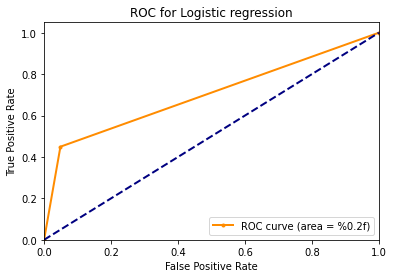

In [22]:
plt.figure()
plt.title('ROC for Logistic regression')
plt.plot(fpr, tpr, color='darkorange',marker='.',
         lw=2, label='ROC curve (area = %0.2f)')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# **SVM Classifiers**

Linear Kernel

In [29]:
from sklearn.svm import SVC

In [30]:
svc = SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)

In [31]:
print("Accuracy:",accuracy_score(y_test, svc_pred)*100)
print("Precision:",precision_score(y_test, svc_pred)*100)
print("Recall:",recall_score(y_test, svc_pred)*100)

Accuracy: 84.33333333333334
Precision: 77.77777777777779
Recall: 37.98449612403101


In [32]:
cm = confusion_matrix(y_test, svc_pred)
print(cm)

[[457  14]
 [ 80  49]]


In [33]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, svc_pred)
auc = roc_auc_score(y_test, svc_pred)
print('AUC: %.3f' % auc)

AUC: 0.675


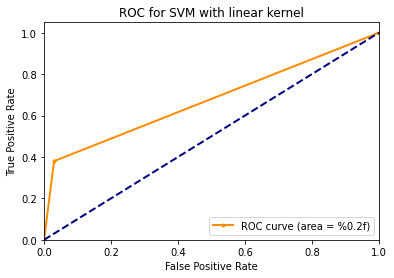

In [34]:
plt.figure()
plt.title('ROC for SVM with linear kernel')
plt.plot(fpr, tpr, color='darkorange',marker='.',
         lw=2, label='ROC curve (area = %0.2f)')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

Polynomial Kernel

In [35]:
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
y_pred = svclassifier.predict(X_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[454  17]
 [ 82  47]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       471
           1       0.73      0.36      0.49       129

    accuracy                           0.83       600
   macro avg       0.79      0.66      0.69       600
weighted avg       0.82      0.83      0.81       600



AUC: 0.664


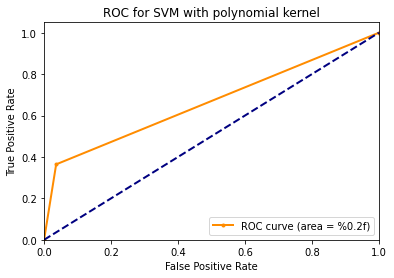

In [38]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)
plt.figure()
plt.title('ROC for SVM with polynomial kernel')
plt.plot(fpr, tpr, color='darkorange',marker='.',
         lw=2, label='ROC curve (area = %0.2f)')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


RBF Kernal (Finding out the best parameter)

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [41]:
grid = GridSearchCV(SVC(),param_grid,verbose = 3)

In [42]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.821, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.812, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.808, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.798, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.810, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.838, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.846, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.844, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.829, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   26.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [43]:
grid.best_estimator_

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
grid_pred = grid.predict(X_test)

In [45]:
print("Accuracy:",accuracy_score(y_test, grid_pred)*100)
print("Precision:",precision_score(y_test, grid_pred)*100)
print("Recall:",recall_score(y_test, grid_pred)*100)

Accuracy: 85.0
Precision: 80.0
Recall: 40.310077519379846


In [46]:
print(confusion_matrix(y_test, grid_pred))
print(classification_report(y_test, grid_pred))

[[458  13]
 [ 77  52]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       471
           1       0.80      0.40      0.54       129

    accuracy                           0.85       600
   macro avg       0.83      0.69      0.72       600
weighted avg       0.84      0.85      0.83       600



AUC: 0.688


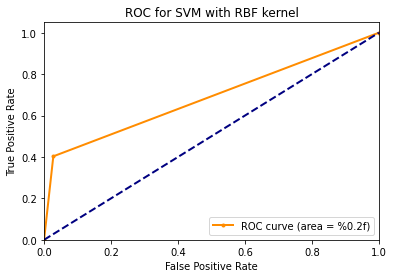

In [47]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, grid_pred)
auc = roc_auc_score(y_test, grid_pred)
print('AUC: %.3f' % auc)
plt.figure()
plt.title('ROC for SVM with RBF kernel')
plt.plot(fpr, tpr, color='darkorange',marker='.',
         lw=2, label='ROC curve (area = %0.2f)')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.76

In [24]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

[Text(418.5, 475.65000000000003, 'X[4] <= 1.042\ngini = 0.327\nsamples = 2399\nvalue = [1905, 494]'),
 Text(209.25, 339.75, 'X[4] <= 0.286\ngini = 0.219\nsamples = 2029\nvalue = [1775, 254]'),
 Text(104.625, 203.85000000000002, 'X[4] <= -0.026\ngini = 0.151\nsamples = 1523\nvalue = [1398, 125]'),
 Text(52.3125, 67.94999999999999, 'gini = 0.124\nsamples = 1230\nvalue = [1148, 82]'),
 Text(156.9375, 67.94999999999999, 'gini = 0.25\nsamples = 293\nvalue = [250, 43]'),
 Text(313.875, 203.85000000000002, 'X[1] <= -0.08\ngini = 0.38\nsamples = 506\nvalue = [377, 129]'),
 Text(261.5625, 67.94999999999999, 'gini = 0.315\nsamples = 414\nvalue = [333, 81]'),
 Text(366.1875, 67.94999999999999, 'gini = 0.499\nsamples = 92\nvalue = [44, 48]'),
 Text(627.75, 339.75, 'X[3] <= 1.416\ngini = 0.456\nsamples = 370\nvalue = [130, 240]'),
 Text(523.125, 203.85000000000002, 'X[4] <= 1.394\ngini = 0.375\nsamples = 260\nvalue = [65, 195]'),
 Text(470.8125, 67.94999999999999, 'gini = 0.482\nsamples = 89\nvalue

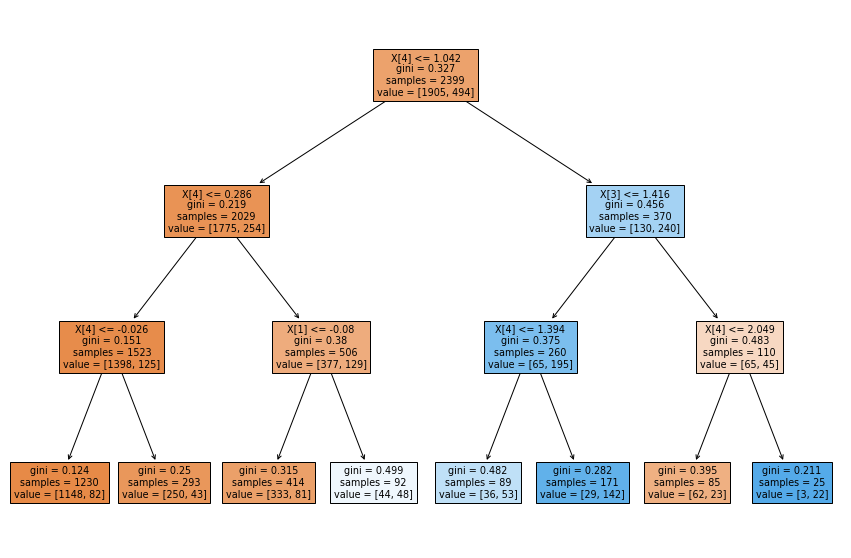

In [25]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf_gini,filled=True)

In [48]:
y_pred = clf_gini.predict(X_test)
y_prob_preddc=clf_gini.predict_proba(X_test)
print ("Accuracy :", accuracy_score(y_test,y_pred)*100)
print("Precision:",precision_score(y_test, y_pred,average='weighted',zero_division=1))
print("Recall:",recall_score(y_test, y_pred,average='weighted',zero_division=1))

Accuracy : 84.0
Precision: 0.8291914492426882
Recall: 0.84


# **Ensemble Classifer**

In [ ]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, cross_val_predict, GridSearchCV

In [ ]:
def classification(classifier):
    # Training The Model
    classifier.fit(X_train, y_train)

    # KFold Accuracies on Training Data
    kfold_accuracy = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs=-1)
    print("K-Fold Accuracy Score:\n", kfold_accuracy, "\n")
    print("Avg K-Fold Accuracy Score:", kfold_accuracy.mean(), "\n")

    # Prediction on Testing Data
    y_pred = cross_val_predict(estimator = classifier, X = X_test, y = y_test, cv = 10, n_jobs=-1)
            
    # Accuracy for y_test and y_pred
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy Score:", accuracy, "\n")

    # Confusion Matrix
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred), "\n")

    # Classification Report
    print(classification_report(y_test, y_pred))

    #ROC curve
    from sklearn.metrics import roc_curve, auc, roc_auc_score

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    print('AUC: %.3f' % auc)
    plt.figure()
    plt.title('ROC for {}'.format(classifier))
    plt.plot(fpr, tpr, color='darkorange',marker='.',
            lw=2, label='ROC curve (area = %0.2f)')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

K-Fold Accuracy Score:
 [0.84166667 0.85416667 0.85       0.8625     0.875      0.8625
 0.81666667 0.84166667 0.87083333 0.84100418] 

Avg K-Fold Accuracy Score: 0.8516004184100419 

Accuracy Score: 0.8516666666666667 

Confusion Matrix:
 [[450  21]
 [ 68  61]] 

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       471
           1       0.74      0.47      0.58       129

    accuracy                           0.85       600
   macro avg       0.81      0.71      0.74       600
weighted avg       0.84      0.85      0.84       600

AUC: 0.714


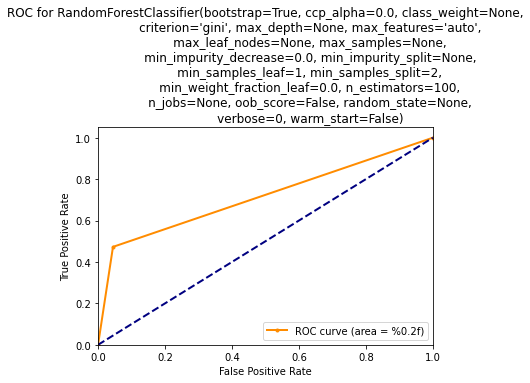

In [ ]:
rf_clf = ensemble.RandomForestClassifier()
classification(rf_clf)

K-Fold Accuracy Score:
 [0.83333333 0.83333333 0.85       0.85       0.87083333 0.85833333
 0.80833333 0.84166667 0.86666667 0.81171548] 

Avg K-Fold Accuracy Score: 0.8424215481171549 

Accuracy Score: 0.8283333333333334 

Confusion Matrix:
 [[445  26]
 [ 77  52]] 

              precision    recall  f1-score   support

           0       0.85      0.94      0.90       471
           1       0.67      0.40      0.50       129

    accuracy                           0.83       600
   macro avg       0.76      0.67      0.70       600
weighted avg       0.81      0.83      0.81       600

AUC: 0.674


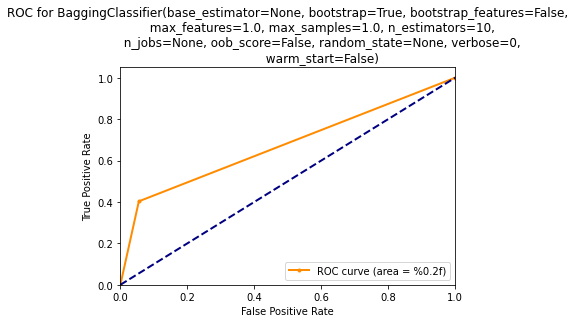

In [ ]:
bag_clf = ensemble.BaggingClassifier()
classification(bag_clf)

K-Fold Accuracy Score:
 [0.84583333 0.85833333 0.84166667 0.84583333 0.86666667 0.875
 0.82083333 0.86666667 0.86666667 0.84518828] 

Avg K-Fold Accuracy Score: 0.8532688284518828 

Accuracy Score: 0.8333333333333334 

Confusion Matrix:
 [[443  28]
 [ 72  57]] 

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       471
           1       0.67      0.44      0.53       129

    accuracy                           0.83       600
   macro avg       0.77      0.69      0.72       600
weighted avg       0.82      0.83      0.82       600

AUC: 0.691


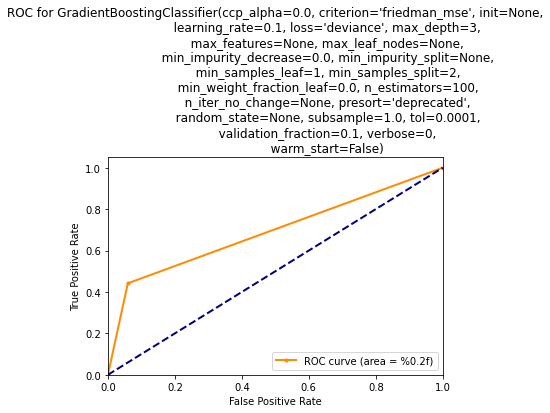

In [ ]:
grad_boost_clf=ensemble.GradientBoostingClassifier()
classification(grad_boost_clf)

# **Conclusion**

In [49]:
d = {'lr_accuracy': 84.3, 'svm_linear_accuracy': 84.3, 'csvm_poly_accuracy': 83.0,'svm_rbf_accuracy':85.0,'ensemble_rf_accuracy':85.1,'ensemble_bagging_accuracy':82.0,'ensemble_gradBoost_accuracy':83.3,'decision_tree':84.0}
ser = pd.Series(data=d, index=['lr_accuracy', 'svm_linear_accuracy','svm_rbf_accuracy','ensemble_rf_accuracy','ensemble_bagging_accuracy','ensemble_gradBoost_accuracy','decision_tree']).sort_values(ascending=False)

Text(0.5, 1.0, 'Conclusion')

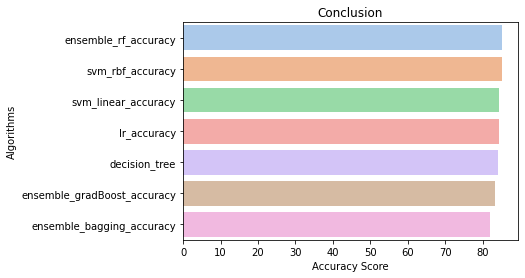

In [50]:
sns.barplot(x=ser, y=ser.index, palette = 'pastel')
plt.xlabel('Accuracy Score')
plt.ylabel('Algorithms')
plt.title("Conclusion")